# Predicting Airbnb Listing Prices in New York City Using Regression Models
## *Project Proposal*
Zhe (Peter) Huang

***

### Github Repository

https://github.com/huang960404/data1030-project

***

### Background

Airbnb brought us a new way of traveling and exploring the world other than staying in "boring" hotels. However, unlike hotels, the pricing for Airbnb is more customized and, therefore, more variant. When we book a place on Airbnb, we always ask ourselves: is this place worth the price? Thus, it may be worthwhile to create a regression model to predict Airbnb prices (target variable: `price`) based on their features, so we can get a reference to a reasonable price for a particular place to stay. The model can help us to achieve the goal of spending less on accommodation but more on our adventures.

***

### Description

The data set is named "New York City Airbnb Open Data", and the original data set can be found [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) on Kaggle. This data set contains information on 48,895 observations of Airbnb listings in New York City in 2019 with 16 variables, in which 5 of them are categorical variables, and the rest are numeric variables, including one date variable. There are 782,320 data points in total with some missing values. The information was collected by Airbnb, Inc. The structure of this data set can be found in the Appendix.

One of the public projects on this data set is [*Data Exploration on NYC Airbnb*](https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb). It analyzes neighborhood listing densities and what areas are more popular, and it uses `latitude` and `longitutde` to analyze listing densities and prices using data visulization.

Another project on this data set is [*Complete Analysis of Airbnb Data - New York City*](https://www.kaggle.com/scsaurabh/complete-analysis-of-airbnb-data-new-york-city). It uses both univariate and bivariate analysis. There are many data visulizations on price distributions of Airbnb listings in different areas/neighbors, on price distributions of each room type, and on price distributions of some other features. In addition, it has two scatterplots of `latitude` vs. `longtitude` to represent neighborhood groups and room availability. 

***

### Exploratory Data Analysis

Let’s start by taking a look at the location of the listings. The following is a scatterplot of `latitude` vs. `longtitude`.

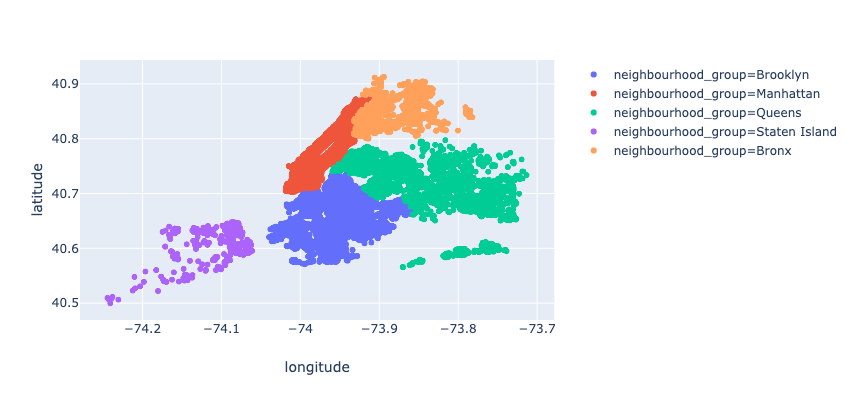

In [8]:
import pandas as pd
df = pd.read_csv('data/AB_NYC_2019.csv')
import plotly.express as px
px.scatter(df, x = 'longitude', y = 'latitude', color = 'neighbourhood_group', width = 640, height = 400)

From the plot, we can see that the majority of listings are in the right side of the plot, and most listings are gathered together, but not spread out with a clear pattern. Next, let’s look at the histogram of `price`.

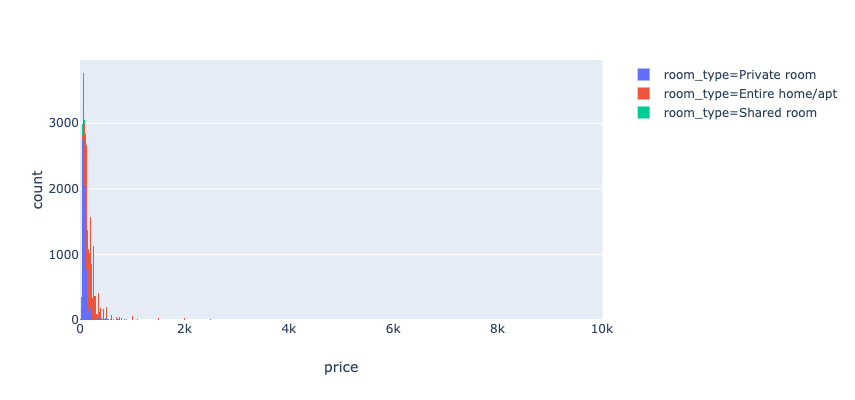

In [3]:
px.histogram(df, x = 'price', color = 'room_type', width = 640, height = 400)

We can see that the price distribution is right-skewed. Most listing prices are less than \$1,000 per night, and there are some outliers that need to be cleaned.

***

### Model Fitting

I used `id` to predict `price`, which is indeed a terrible regression model, but it shows that the model fitting process can be performed in this data set. The code for model fitting can be found in the Appendix.

***

### Preprocessing

For categorical variables, I used one-hot encoder to transform the variables `neighbourhood_group` and `neighbourhood`. I transformed the variables `Shared room`, `Private room`, and `Entire home/apt` using ordinal encoder.

For numeric variables, I used MinMax scaler to transform `availability_365`, and I transformed the variables `minimum_nights`, `number_of_reviews`, `reviews_per_month`, and `calculated_host_listings_count` using standard scaler.

The detailed preprocessing code can be found in the Appendix.

***

### Appendix

#### The Strcture of the Data Set

| Variable                         | Description                                          | Type    |
| -------------------------------- | ---------------------------------------------------- | ------- |
| `id`                             | listing ID                                           | ID      |
| `name`                           | name of the listing                                  | String  |
| `host_id`                        | host ID                                              | ID      |
| `host_name`                      | name of the host                                     | String  |
| `neighbourhood_group`            | location                                             | String  |
| `neighbourhood`                  | area                                                 | String  |
| `latitude`                       | latitude coordinates                                 | Numeric |
| `longitude`                      | longitude coordinates                                | Numeric |
| `room_type`                      | listing space type                                   | String  |
| `price`                          | price in dollars                                     | Numeric |
| `minimum_nights`                 | amount of nights minimum                             | Numeric |
| `number_of_reviews`              | number of reviews                                    | Numeric |
| `last_review`                    | latest review                                        | Date    |
| `reviews_per_month`              | number of reviews per month                          | Numeric |
| `calculated_host_listings_count` | amount of listing per host                           | Numeric |
| `availability_365`               | number of days when listing is available for booking | Numeric |

#### Code

##### Model Fitting

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['id']],df['price'])
model.predict([[df.loc[0, 'id']]])

array([148.30577655])

##### Preprocessing

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

onehot = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
minmax = MinMaxScaler()
standard = StandardScaler()

onehot_col = ['neighbourhood_group', 'neighbourhood']
df_onehot = onehot.fit_transform(df[onehot_col])
df1 = pd.DataFrame(df_onehot, columns = onehot.get_feature_names(onehot_col))

ordinal = OrdinalEncoder(categories = [['Shared room', 'Private room', 'Entire home/apt']])
df_ordinal = ordinal.fit_transform(df[['room_type']])
df2 = pd.DataFrame(df_ordinal, columns = ['room_type'])

df_minmax = minmax.fit_transform(df[['availability_365']])
df3 = pd.DataFrame(df_minmax, columns = ['availability_365'])

standard_col = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
df_standard = standard.fit_transform(df[standard_col])
df4 = pd.DataFrame(df_standard, columns = standard_col)

Airbnb = pd.concat([df1, df2, df3, df4, df[['latitude', 'longitude', 'last_review', 'price']]], axis = 1) # the preprocessed data